# Preparation

In [1]:
# These are my default settings
import warnings
warnings.filterwarnings("ignore")

import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib

plt.rcParams["figure.figsize"] = (12, 6)
sns.set()
pd.set_option("display.max_columns", None)


### Load IMDB dataset

In [2]:
from tensorflow.keras.datasets import imdb

(train_samples, train_labels), (test_samples, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


### Encode the integer seq

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_samples)
x_test = vectorize_sequences(test_samples)

In [7]:
print(x_train.shape, x_test.shape)

(25000, 10000) (25000, 10000)


In [6]:
# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
print(y_train.shape, y_test.shape)

(25000,) (25000,)


# Model training

#### In this project, I use sklearn clf model. In this case, I choose simple LogisticRegression model.

In [9]:
# model construction
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train.reshape(len(x_train), -1), y_train)

LogisticRegression()

#### To evaluate, I choose accuracy metrics.
$$
Accuracy= 
\frac{Number of Correct Predictions}{Total Number of Predictions}
$$

In [10]:
# evaluation
y_pred = model.predict(x_test.reshape(len(x_test), -1))


correct_predictions = 0

for predicted, true in zip(y_pred, y_test):
    if predicted == true:
        correct_predictions += 1

total_samples = len(y_pred)
accuracy = correct_predictions / total_samples

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


### Evaluate with matrix

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

def make_report(model, X, y, label_0, label_1):
    """This function lets Classification_report, Confusion Matrix(Heat map) and ROC-AUC out. FOR BINARY CLASSIFICATION ONLY"""
    
    # Classification_report
    y_pred = model.predict(X)
    cr = classification_report(y_true=y, y_pred=y_pred>0.75)
    print(cr)
    
    # Confusion Matrix(Heat map)
    cm = confusion_matrix(y_true=y, y_pred=y_pred>0.75)
    cm_heat = pd.DataFrame(data=cm, index=[label_0, label_1], 
                           columns=[label_0, label_1])
    sns.heatmap(cm_heat, square=True, annot=True, cmap="Spectral")
    plt.xlabel("Pred")
    plt.ylabel("True")
    plt.yticks(rotation=0)
    plt.show()
    

    # ROC-AUC

    fpr, tpr, thresholds = roc_curve(y, y_pred)
    ac = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%ac)
    plt.fill_between(fpr, tpr, 0, color="red", alpha=0.1)
    plt.legend()
    plt.xlabel('FPR: False positive rate')
    plt.ylabel('TPR: True positive rate')
    # plt.grid()
    plt.show()

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86     12500
         1.0       0.86      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



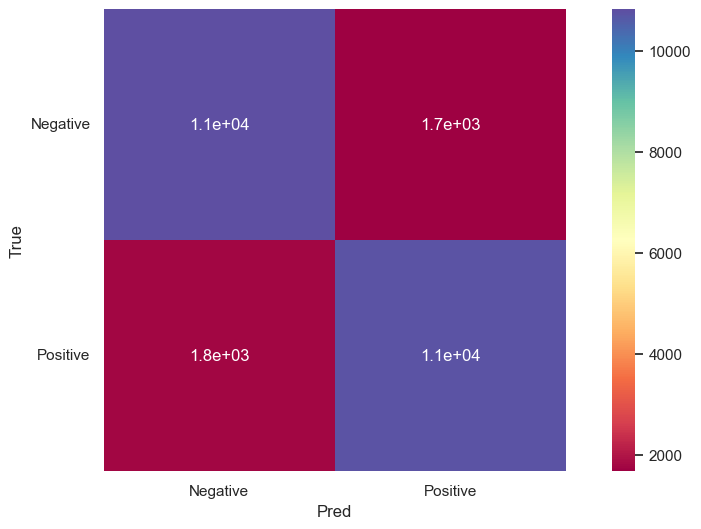

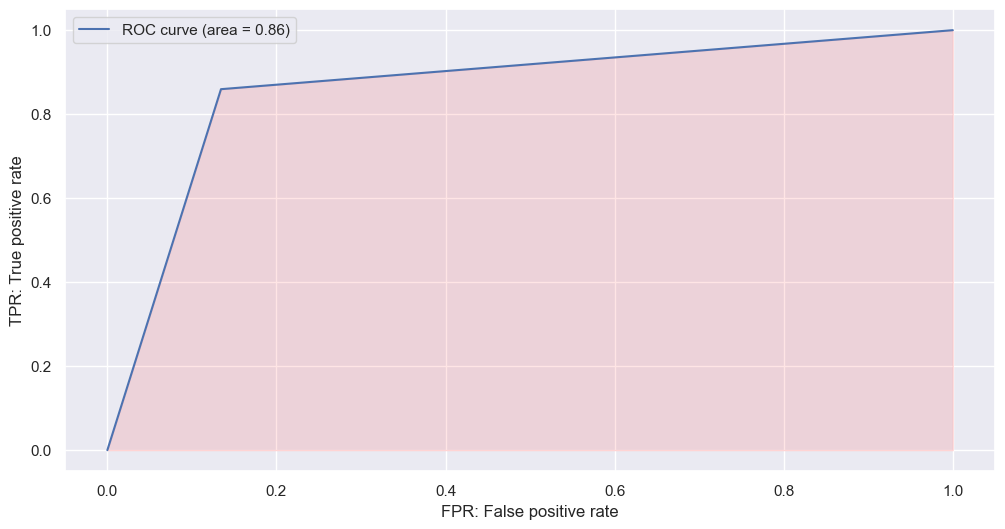

In [12]:
make_report(model, x_test.reshape(len(x_test), -1), y_test, "Negative", "Positive")